<a href="https://colab.research.google.com/github/pra1608/LMP/blob/main/final_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [ ]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [ ]:
k= 385 # (W/mK)
rho= 8960 #(kg/m**3)
C=376.812 #(J/Kg-K)

In [ ]:
lmda= 1064*10**(-9)  # nm
n_c= 0.37863
k_c= 7.0660
n_a= 1.00027398
k_a= 0
# Reflectivity Calculation
R= (((n_c- n_a)**2+(k_c- k_a)**2)/((n_c+ n_a)**2+ (k_c+ k_a)**2))


In [ ]:
R

0.9707709284942617

In [ ]:
# Absorption Coefficient
absorp_coff = (4*(numpy.pi)* k_c)/ lmda
diffusion_coff = k/(rho*C)
tp = 10*10**(-9)
delta_t = (diffusion_coff*tp)**0.5
factor = ((numpy.pi)/(4*numpy.log(2)))**0.5
I_max = 10**4/(factor*tp)
I_0= (1-R)*I_max
print(I_0)

27458879394.268288


In [ ]:
I_0

27458879394.268288

In [ ]:
absorp_coff

83452983.7979905

In [ ]:
diffusion_coff

0.00011403232911903017

In [ ]:
# Set parameters.
Lent = 0.000005  # length of the rod
nx = 501 # number of locations on the rod
dx = Lent / (nx - 1)  # distance between two consecutive locations
# Define the locations along the rod.
x = numpy.linspace(0.0, Lent, num=nx)

# Set the initial temperature along the rod.
T0 = 10*numpy.ones(nx+2)



In [ ]:
def ftcs(T0,nt, k, dt, dx,diffusion_coff,absorp_coff,I_0, x):
    """
    Computes and returns the temperature along the rod
    after a provided number of time steps,
    given the initial temperature and thermal diffusivity.
    The diffusion equation is integrated using forward 
    differencing in time and central differencing in space.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature along the rod as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    alpha : float
        The thermal diffusivity of the rod.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature along the rod as a 1D array of floats.
    """
    T = T0.copy()
    sigma = diffusion_coff * dt / dx**2
    beta = I_0*absorp_coff*dt*diffusion_coff/(k)
    Temperature = numpy.zeros((nt, nx+2))

    for n in range(nt):
        T[1:-1] = (T[1:-1] + 
                   sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]) +  
                   beta*numpy.exp(-1*absorp_coff*x))
        T[-1] = T[-2]
        T[0] = T[1]
        Temperature[n,:] = T


    return T, Temperature

In [ ]:
# Set the time-step size based on CFL limit.
sigma =  (1/3)
t0=0  # initial time
tf=tp# final time (s)
dt= (((sigma)*((dx)**2))/(diffusion_coff))  # time step
nt =int(((tf-t0)/dt))+1  # number of time steps
time = numpy.linspace(0,tp,nt)
# Compute the temperature along the rod.
T, Temperature = ftcs(T0, nt, k, dt, dx, diffusion_coff, absorp_coff,I_0, x)

In [ ]:
L = Temperature[:,1:-1]

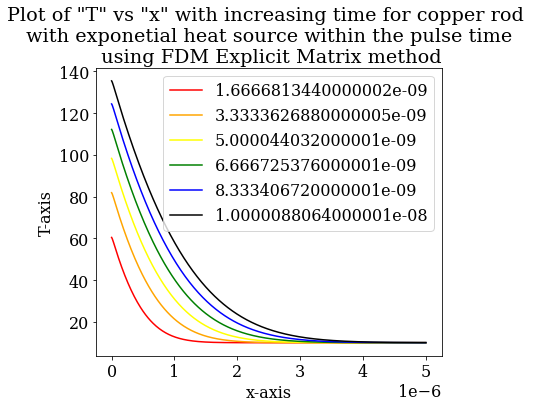

In [ ]:
# plot explicit case
fig4 = pyplot.figure(figsize=(6,5))
left, bottom, width, height= 0.05,0.05,0.8,0.8 
ax4 = fig4.add_axes([left, bottom, width, height]) 

    # Plotting figure with labels, title and legends
pyplot.plot(x, L[int(nt/6),:], "red",x, L[int(2*nt/6),:], "orange",x, L[int(3*nt/6),:], "yellow")
pyplot.plot(x, L[int(4*nt/6),:], "green",x, L[int(5*nt/6),:], "blue",x, L[-1,:], "black")
pyplot.legend([(t0+dt*(nt/6)),(t0+dt*(2*nt/6)), (t0+dt*(3*nt/6)), (t0+dt*(4*nt/6)), (t0+dt*(5*nt/6)), (t0+dt*(6*nt/6)) ])
ax4.set_title('Plot of "T" vs "x" with increasing time for copper rod \n with exponetial heat source within the pulse time \n using FDM Explicit Matrix method')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('T-axis')
pyplot.show()

(0.0, 5.0)

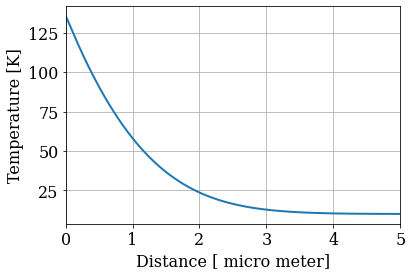

In [ ]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [ micro meter]')
pyplot.ylabel('Temperature [K]')
pyplot.grid()
pyplot.plot(x*10**6, T[1:-1], color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, Lent*10**(6))

In [ ]:
# Closed form solution
from scipy import special
n = nt
m = nx
def ierfc (u):
    return (numpy.exp(-(numpy.multiply(u,u)))/(numpy.sqrt(numpy.pi)))- u*(1- special.erf(u))

# filling a matrix containg temperature data by closed form solution
Tpt = numpy.zeros(m)
Dpt = numpy.zeros((n,m))
for j in range (1,n):
    Tpt[0:]= 10 + (2*I_0/k)* ((numpy.sqrt(diffusion_coff*time[j]))*ierfc((x)/(2*(numpy.sqrt(diffusion_coff*time[j])))))
    Dpt[j,:] = Tpt




In [ ]:
Temperature

array([[ 10.19840047,  10.19840047,  10.08612138, ...,  10.        ,
         10.        ,  10.        ],
       [ 10.35937458,  10.35937458,  10.19342315, ...,  10.        ,
         10.        ,  10.        ],
       [ 10.5024579 ,  10.5024579 ,  10.29837423, ...,  10.        ,
         10.        ,  10.        ],
       ...,
       [135.40219775, 135.40219775, 134.81255279, ...,  10.07572167,
         10.07567637,  10.07567637],
       [135.4040499 , 135.4040499 , 134.81440485, ...,  10.07573678,
         10.07569147,  10.07569147],
       [135.40590202, 135.40590202, 134.81625689, ...,  10.07575189,
         10.07570657,  10.07570657]])

In [ ]:
Dpt

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [10.46464466, 10.06209589, 10.00272689, ..., 10.        ,
        10.        , 10.        ],
       [10.65710678, 10.17598077, 10.02784889, ..., 10.        ,
        10.        , 10.        ],
       ...,
       [95.9366542 , 95.22532069, 94.5177554 , ..., 10.02765421,
        10.02696714, 10.02629611],
       [95.93791031, 95.22657678, 94.51901141, ..., 10.02765968,
        10.02697249, 10.02630134],
       [95.93916641, 95.22783286, 94.5202674 , ..., 10.02766514,
        10.02697783, 10.02630657]])

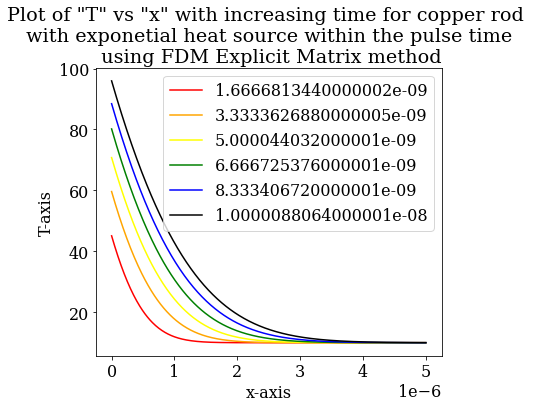

In [ ]:
fig4 = pyplot.figure(figsize=(6,5))
left, bottom, width, height= 0.05,0.05,0.8,0.8 
ax4 = fig4.add_axes([left, bottom, width, height]) 

    # Plotting figure with labels, title and legends
pyplot.plot(x, Dpt[int(n/6),:], "red",x, Dpt[int(2*n/6),:], "orange",x, Dpt[int(3*n/6),:], "yellow")
pyplot.plot(x, Dpt[int(4*n/6),:], "green",x, Dpt[int(5*n/6),:], "blue",x, Dpt[-1,:], "black")
pyplot.legend([(t0+dt*(n/6)),(t0+dt*(2*n/6)), (t0+dt*(3*n/6)), (t0+dt*(4*n/6)), (t0+dt*(5*n/6)), (t0+dt*(6*n/6)) ])
ax4.set_title('Plot of "T" vs "x" with increasing time for copper rod \n with exponetial heat source within the pulse time \n using FDM Explicit Matrix method')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('T-axis')
pyplot.show()


In [ ]:
err_len = len((numpy.square(numpy.divide((Temperature[-1,1:-1]-Dpt[-1,:]),Temperature[-1,1:-1]))))
numpy.sum((numpy.square(numpy.divide((Temperature[-1,1:-1]-Dpt[-1,:]),Temperature[-1,1:-1]))))/err_len



0.030126801913364882

In [ ]:
err_len

501